In [34]:
#Importing the libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline


In [35]:
#making a function to generate data

def generateUniformData(l, u, N, gVar):
      
         '''where l is lower value, u is upper [l,u) , N is number of sample of the uniformly spaced data,
         gVar is the variance of the Gaussian random noise which has zero mean'''
         step = (u-l)/(N)
         x = np.arange(l + step/2, u +step/2, step) #numpy.arange([start, ]stop, [step, ]dtype=None)
         #Draw random samples from a normal (Gaussian) distribution.
         e = np.random.normal(0, gVar, N) #numpy.random.normal(loc=0.0, scale=1.0, size=None), loc- mean, scale - variance
         #generating a non-linear func
         t= np.sin(2*math.pi*x) + e
         return x,t
                      
    

In [36]:
#making thep plot function
def PlotData(x1, t1, x2, t2, x3= None, t3 = None, legend =[]):
    p1 = plt.plot(x1, t1, 'bo')#training data
    p2 = plt.plot(x2, t2, 'g') #plot true data
    if(x3 is not None):
        p3 = plt.plot(x3, t3, 'r')
    plt.xlabel('x')
    plt.ylabel('t')
    
    if(x3 is None):
        plt.legend((p1[0], p2[0]), legend)
    else:
        plt.legend((p1[0], p2[0], p3[0]), legend)
        


[-6.23719875e-09 -1.56163876e-08 -3.90131409e-08 -9.75366544e-08
 -2.43845782e-07 -6.09613010e-07 -1.52403212e-06 -3.81008089e-06
 -9.52520220e-06 -2.38130054e-05]
[-6.23719875e-09 -1.56163876e-08 -3.90131409e-08 -9.75366544e-08
 -2.43845782e-07 -6.09613010e-07 -1.52403212e-06 -3.81008089e-06
 -9.52520220e-06 -2.38130054e-05]


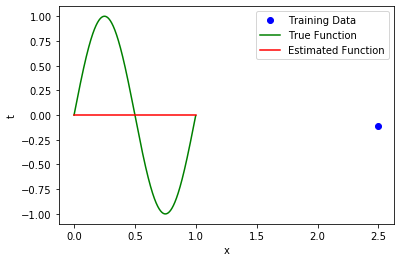

In [46]:
#making function to fit the data  
def fitdataReg(x, t, M, la):
    X= np.array([x ** m for m in range (M+1)]).T
    w = np.linalg.inv(X.T@X + (la* np.identity(M+1)))@X. T@t
    return w

l = 0
u = 1
N = 5
gVar= 0.1

data_uniform = np.array(generateUniformData(N, l , u , gVar)).T
x1 = data_uniform[:, 0]
t1 = data_uniform[: , 1]

w = fitdataReg(x1,t1,9,1) #model order = 9, lambda = 10
#change lambda  and see the different values
print(w)


x2 = np.arange(l,u,0.001)  #get equally spaced points in the xrange
t2 = np.sin(2*math.pi*x2) #compute the true function value

    
X3 = np.array([x2**m for m in range(M+1)]).T
x3 = x2
t3 = X3@w

PlotData(x1, t1, x2, t2, x3, t3, legend=['Training Data', 'True Function', 'Estimated Function'])
print(w)



